## Linear Regression on a Ecommerce dataset

*(Udemy Exercise)*

You just got some contract work with an ECommerce company based in New York City that sells clothing online but
they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings 
with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.
The company is trying to decide whether to focus their efforts on their mobile app experience or their website. 
They've hired you on contract to help them figure it out! Let's get started!

In [12]:
# Library imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset and validations

In [6]:
customers = pd.read_csv("/Users/suvosmac/OneDrive/Documents/ML-Datasets/ML-Bootcamp/Ecommerce Customers")

# Check the initial rows

customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [7]:
# Check the structure of the dataframe

customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


### Data Preparation

In [8]:
# Check for null values
customers.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

There are no null or missing values in our dataset

In [10]:
# Check the column names

customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [9]:
# Check sumamry statistics

customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


### Data Visualizations

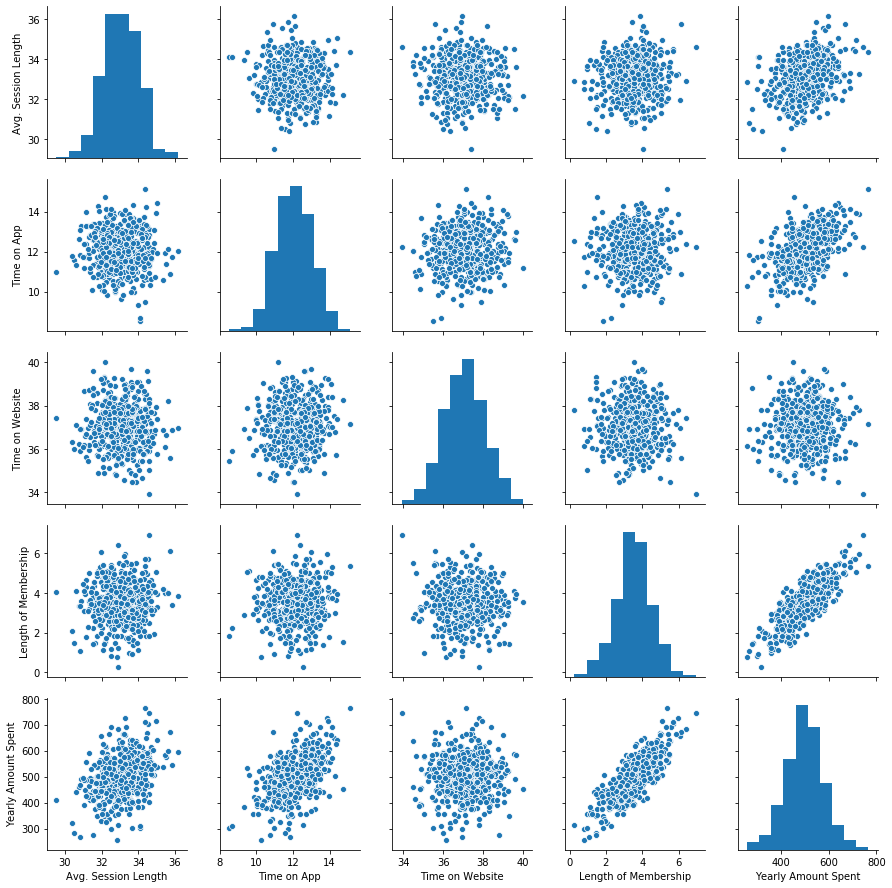

In [13]:
# Lets visualization intra relationships across entire dataset

sns.pairplot(customers)

We will now explore some relationships between Yearly Amount spent vs
- Length of Membership
- Time on Website
- Time on App

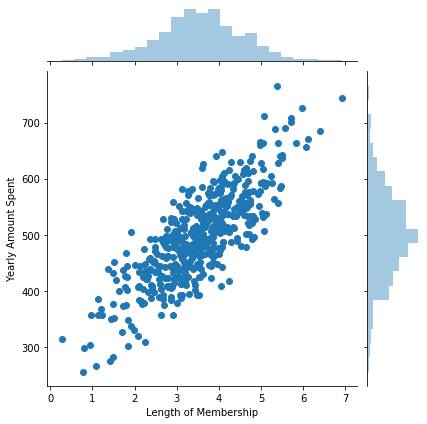

In [15]:
sns.jointplot(x='Length of Membership', y='Yearly Amount Spent', data=customers)

Clear indication of increased spent as the length of membership increases

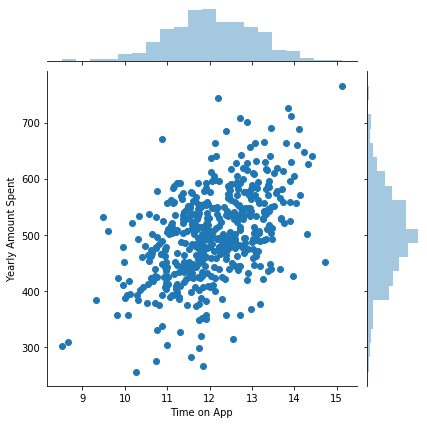

In [18]:
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=customers)

The spend also increases with increased time on App

In [21]:
# Let us explore the only categorical variable 'Avatar'

customers['Avatar'].value_counts()

Teal              7
SlateBlue         7
Cyan              7
GreenYellow       7
CadetBlue         7
                 ..
Yellow            1
LightSlateGray    1
LawnGreen         1
PowderBlue        1
PaleGoldenRod     1
Name: Avatar, Length: 138, dtype: int64

There are <em>138</em> unique Avatar labels

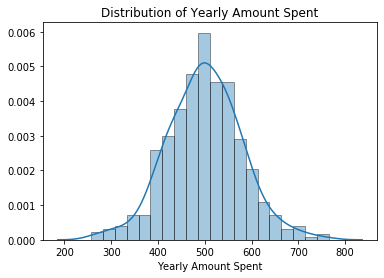

In [22]:
# Lets study the distribution of the target variable

sns.distplot(customers['Yearly Amount Spent'], hist_kws=dict(edgecolor='k', linewidth=1), bins=20)
plt.title("Distribution of Yearly Amount Spent");

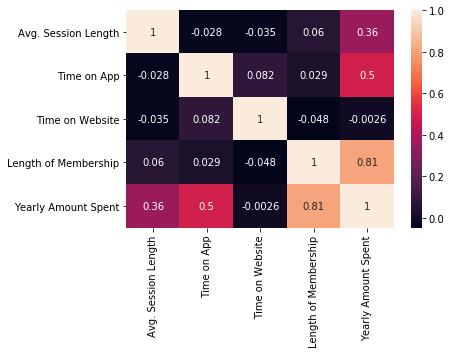

In [24]:
# We can observe the entire correlation in the data frame and draw a heatmap for the same

sns.heatmap(customers.corr(), annot=True)

### Model Linear Regression using sklearn

In [34]:
# Necessary imports

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [37]:
# We will separate out features and target variables

features = customers[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
target = customers['Yearly Amount Spent']

In [38]:
# split into training and test data

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3,
                                                                           random_state=101)

In [39]:
# instantiate linear regression object

lm = LinearRegression()

# Fit the model
lm.fit(features_train, target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Model Evaluation

In [42]:
# We will check the intercepts and coefficients

print("Intercept")
print(lm.intercept_)

# We will relate the coefficients with the training columns
print("\n")
print("Coefficients")
coefDf = pd.DataFrame(lm.coef_[0], features_train.columns, columns=['Coeff'])
coefDf.head()

Intercept
-1047.9327822502387


Coefficients


,Coeff
Avg. Session Length,25.98155
Time on App,25.98155
Time on Website,25.98155
Length of Membership,25.98155


In [43]:
# predictions using the model

predictions = lm.predict(features_test)

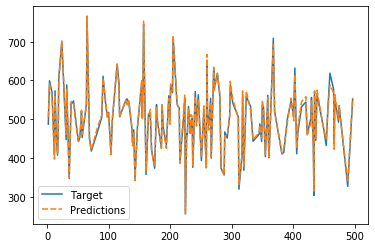

In [44]:
# We will create a small dataframe for target and predictions and visualize the two variables

resultDf = pd.DataFrame({"Target": target_test, "Predictions": predictions})
sns.lineplot(data=resultDf)

We see the model has done a very close predictions

Text(0.5, 1.0, 'Target Vs Predictions')

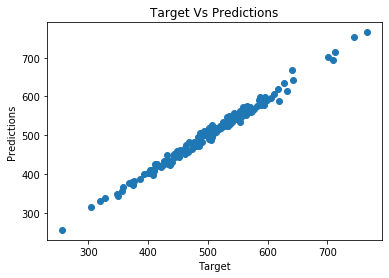

In [48]:
# Another way to visually analyse actual vs predictions
plt.scatter(target_test, predictions)
plt.xlabel("Target")
plt.ylabel("Predictions")
plt.title("Target Vs Predictions")

Text(0.5, 1.0, 'Plot for Residual Errors')

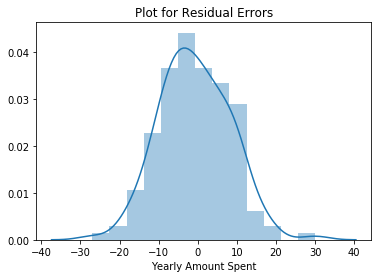

In [49]:
# We will now plot the residual errors

residuals = target_test - predictions
sns.distplot(residuals)
plt.title("Plot for Residual Errors")

We see the distribution plot for residual errors, has a mean of 0(almost!!) and normally distributed

Text(0.5, 1.0, 'Predictions Vs Residuals')

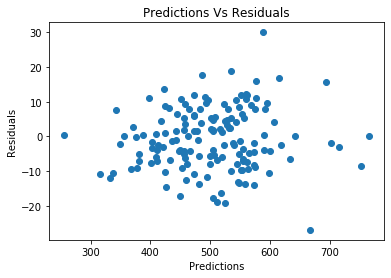

In [50]:
# We will check for heteroskedasticity

plt.scatter(predictions, residuals)
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.title('Predictions Vs Residuals')

We see there is no pattern emerging out from the plot between Predictions and Residuals. Hence we can conclude,
the model doesnt not suffer from heteroskedasticity

#### Regression Evaluation Metrics

Here are three common evaluation metrics for regression problems:
    
*Mean Absolute Error (MAE)* is the mean of the absolute value of the errors:
 
*Mean Squared Error (MSE)* is the mean of the squared errors:
 
*Root Mean Squared Error (RMSE)* is the square root of the mean of the squared errors:
 
Comparing these metrics:
    
MAE is the easiest to understand, because it's the average error.
MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.
All of these are loss functions, because we want to minimize them.

In [52]:
# to calculate all of these metrics

from sklearn import metrics

print('MAE                  ', metrics.mean_absolute_error(target_test, predictions))
print('MSE                  ', metrics.mean_squared_error(target_test, predictions))
print('RMSE                 ', metrics.mean_squared_error(target_test, predictions))
print('Explained Variance   ', metrics.explained_variance_score(target_test, predictions))

MAE                   7.228148653430853
MSE                   79.81305165097487
RMSE                  79.81305165097487
Explained Variance    0.9890771231889606


We see <em>98.9%</em> variance of the target variable is explained by the features used in this model

### Model Linear Regression using statsmodels

In [53]:
# library imports

import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [56]:
# We will separate out features and target variables and perform a train-test split

features = customers[['Length of Membership']]
target = customers['Yearly Amount Spent']

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3,
                                                                           random_state=101)

In [57]:
# Run the linear regression

model = sm.OLS(target_train, features_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Yearly Amount Spent   R-squared (uncentered):                   0.971
Model:                             OLS   Adj. R-squared (uncentered):              0.971
Method:                  Least Squares   F-statistic:                          1.164e+04
Date:                 Fri, 23 Aug 2019   Prob (F-statistic):                   4.34e-270
Time:                         20:57:51   Log-Likelihood:                         -2056.1
No. Observations:                  350   AIC:                                      4114.
Df Residuals:                      349   BIC:                                      4118.
Df Model:                            1                                                  
Covariance Type:             nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Length of Membership   135.2679      1.254    107.870      0.000     132.802     137.734
==============================================================================
Omnibus:                        0.247   Durbin-Watson:                   1.768
Prob(Omnibus):                  0.884   Jarque-Bera (JB):                0.341
Skew:                           0.055   Prob(JB):                        0.843
Kurtosis:                       2.894   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We tweak this model, as compared to the earlier one and used only one feature variable 'Length of Membership'.
This variable alone explains 97.1% variations in the target variable

In [58]:
# predictions using this model

predictions = model.predict(features_test)

#### Model evaluation

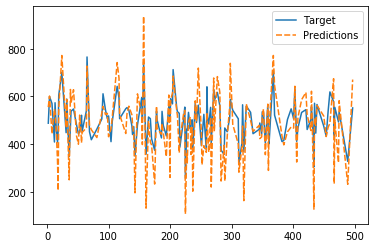

In [59]:
# Now we will create a small dataframe to compare target and predictions
# We will thereafter attempt visualization

Resultdf = pd.DataFrame({'Target': target_test, 'Predictions': predictions})
sns.lineplot(data=Resultdf)

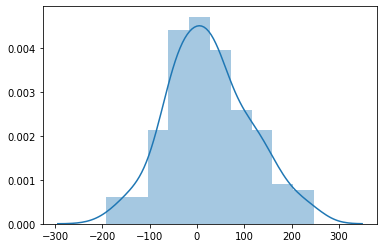

In [60]:
# We will visualize the standard errors
residuals = target_test - predictions
sns.distplot(residuals)

The errors are normally distributed with a mean of 0

Text(0.5, 1.0, 'Predictions vs Residuals')

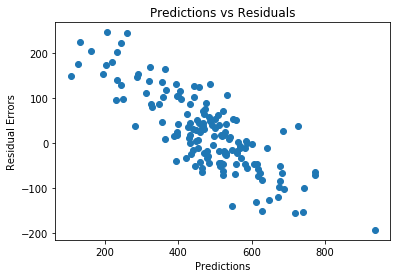

In [61]:
# We will test for Heteroskedasticity

plt.scatter(predictions, residuals)
plt.xlabel('Predictions')
plt.ylabel('Residual Errors')
plt.title('Predictions vs Residuals')


This model suffers from heteroskedasticity as there is a clear pattern emerging out from the above plot.

This tells us, that even if the feature variable explains a lot of variation in target variable, in order to 
remove heteroskedasticity, the other feature variables needs to be included in the model.

However by doing so, there are chances of overfitting the data, hence a balanced call is needed from the 
Data Scientist